import required modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib as mpl

In [2]:
df = pd.read_csv("input/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

## Data exploration

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit = 's')

df.index = df.Timestamp
df_usd_volume_per_day = df.resample('D')['Volume_(Currency)'].sum()
df_usd_volume_per_month = df.resample('M')['Volume_(Currency)'].sum()
df = df.resample('D').mean()

df_month = df.resample('M').mean()

In [5]:
print(df.index.min())
print(df.index.max())

2011-12-31 00:00:00
2020-04-22 00:00:00


### Plots

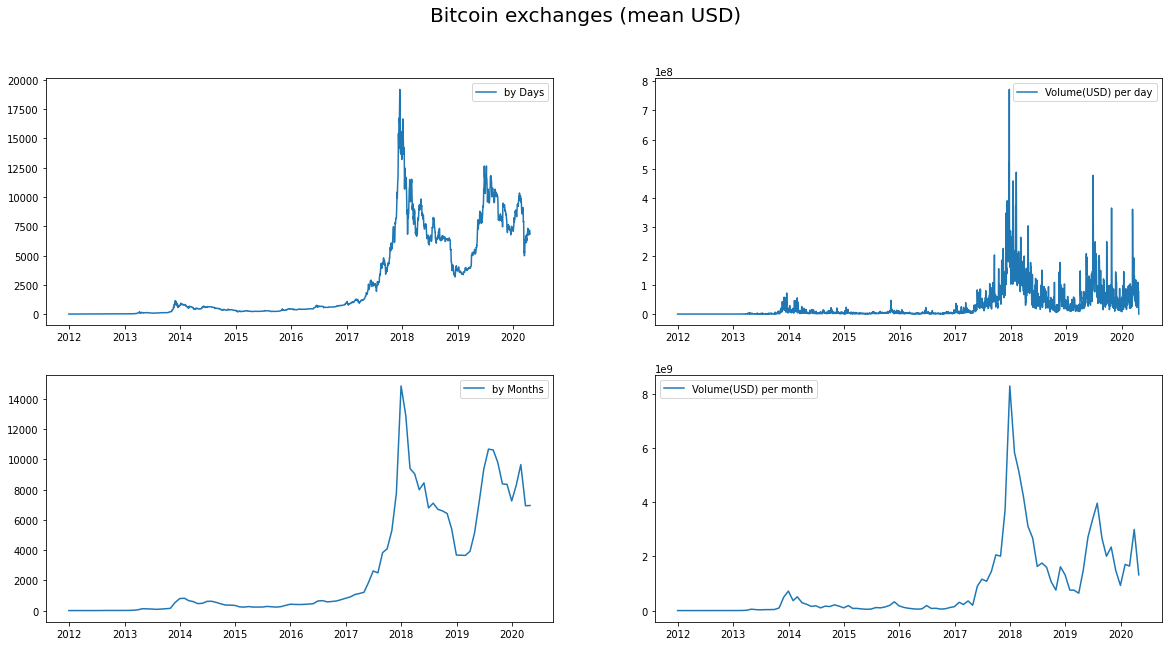

In [6]:
fig = plt.figure(figsize = [20, 10])
plt.suptitle("Bitcoin exchanges (mean USD)", fontsize = 20)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label = 'by Days')
plt.legend()

plt.subplot(222)
plt.plot(df_usd_volume_per_day, '-', label = 'Volume(USD) per day')
plt.legend()

plt.subplot(223)
plt.plot(df_month.Weighted_Price, '-', label = 'by Months')
plt.legend()

plt.subplot(224)
plt.plot(df_usd_volume_per_month, '-', label = 'Volume(USD) per month')
plt.legend()

plt.show()

In [7]:
print("Bitcoin peak: " + str(df.Weighted_Price.idxmax()) + " : " + "{:.2f}".format(df.Weighted_Price.max()))
print("Bitcoin volume peak: " + str(df_usd_volume_per_day.idxmax()) + " : " + "{:.2f}".format(df_usd_volume_per_day.max()))

Bitcoin peak: 2017-12-17 00:00:00 : 19186.17
Bitcoin volume peak: 2017-12-22 00:00:00 : 772143020.64


## Collecting additional data

### Collecting data of the top 4 cryptocurrencies

In [8]:
from apiController import get_data

In [9]:
bitcoin = pd.DataFrame(get_data('BTC', '2017-01-01')['Data'])
ethereum = pd.DataFrame(get_data('ETH', '2017-01-01')['Data'])
litecoin = pd.DataFrame(get_data('LTC', '2017-01-01')['Data'])
ripple = pd.DataFrame(get_data('XRP', '2017-01-01')['Data'])

### Cleanup

In [10]:
bitcoin.head()

,time,close,high,low,open,volumefrom,volumeto
0,1483228800,995.44,1001.61,956.10,963.38,41148.52,4.057092e+07
1,1483315200,1017.05,1031.68,990.20,995.44,64951.63,6.603807e+07
2,1483401600,1033.30,1035.47,1006.53,1017.05,54788.01,5.608587e+07
3,1483488000,1135.41,1148.54,1022.32,1033.30,156272.17,1.705846e+08
4,1483574400,989.35,1150.63,874.53,1135.41,240007.84,2.448393e+08


In [11]:
def change_columns(coin):
    coin.time = pd.to_datetime(coin.time, unit = 's')
    coin.set_index('time', inplace = True)
    coin['Weighted_Price'] = coin[['high', 'low']].mean(axis = 1)
    coin = coin.rename(columns = {'volumeto' : 'Volume_(Currency)'})
    return coin[['Weighted_Price', 'Volume_(Currency)']]

In [12]:
bitcoin = change_columns(bitcoin)
ethereum = change_columns(ethereum)
litecoin = change_columns(litecoin)
ripple = change_columns(ripple)

### Ploting

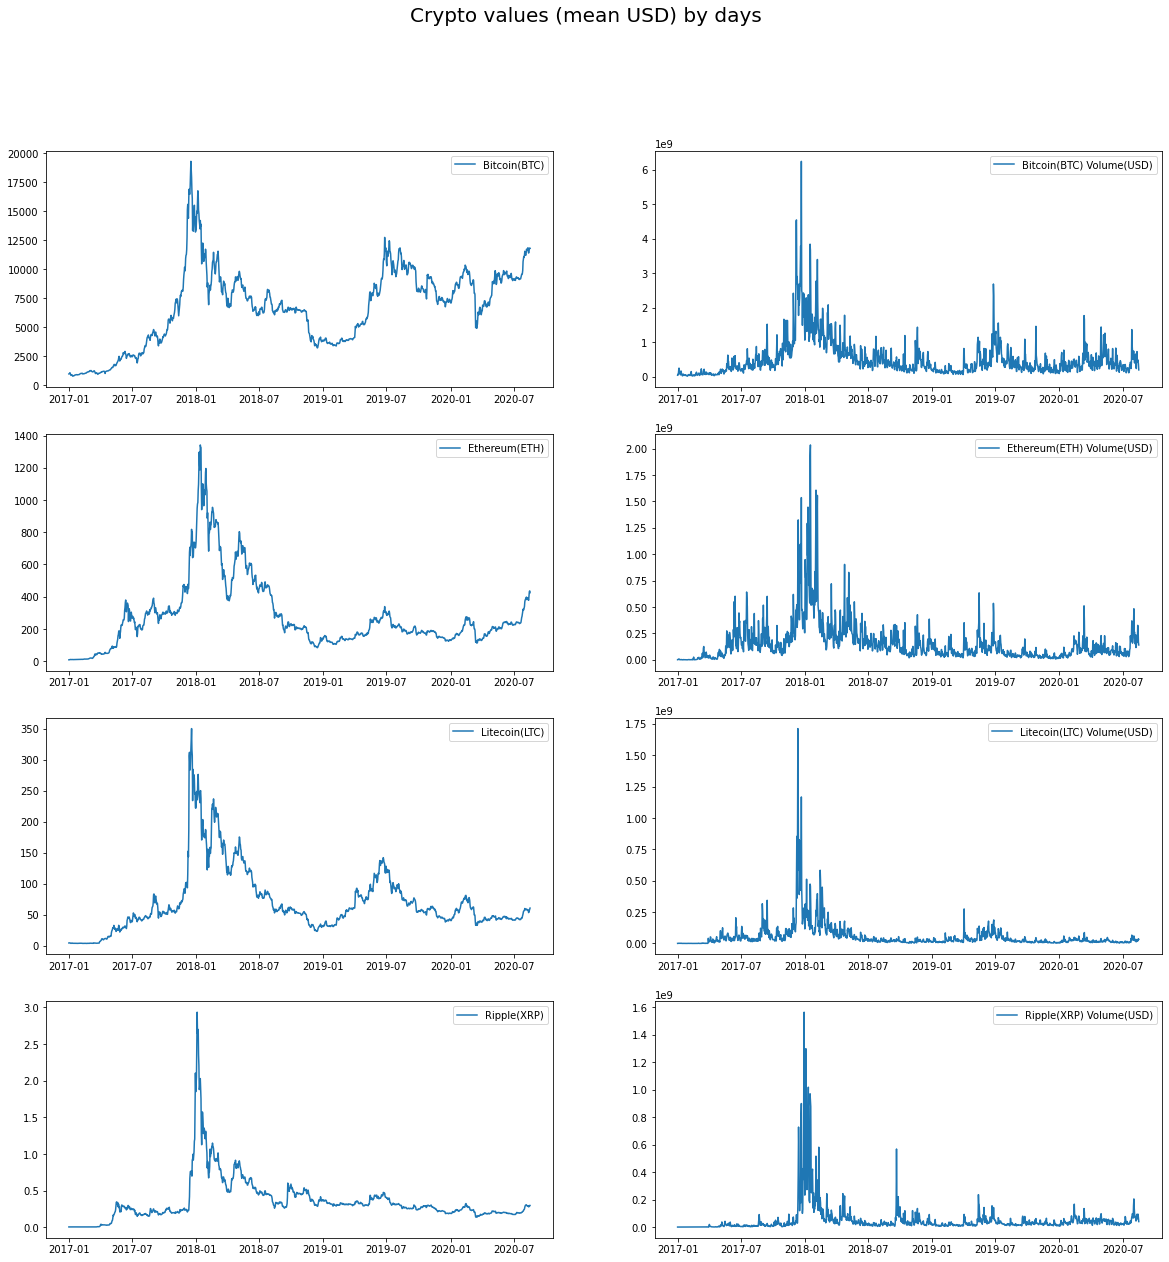

In [13]:
fig = plt.figure(figsize = [20, 20])
plt.suptitle("Crypto values (mean USD) by days", fontsize = 20)

plt.subplot(421)
plt.plot(bitcoin.Weighted_Price, '-', label = 'Bitcoin(BTC)')
plt.legend()

plt.subplot(422)
plt.plot(bitcoin['Volume_(Currency)'], '-', label = 'Bitcoin(BTC) Volume(USD)')
plt.legend()

plt.subplot(423)
plt.plot(ethereum.Weighted_Price, '-', label = 'Ethereum(ETH)')
plt.legend()

plt.subplot(424)
plt.plot(ethereum['Volume_(Currency)'], '-', label = 'Ethereum(ETH) Volume(USD)')
plt.legend()

plt.subplot(425)
plt.plot(litecoin.Weighted_Price, '-', label = 'Litecoin(LTC)')
plt.legend()

plt.subplot(426)
plt.plot(litecoin['Volume_(Currency)'], '-', label = 'Litecoin(LTC) Volume(USD)')
plt.legend()

plt.subplot(427)
plt.plot(ripple.Weighted_Price, '-', label = 'Ripple(XRP)')
plt.legend()

plt.subplot(428)
plt.plot(ripple['Volume_(Currency)'], '-', label = 'Ripple(XRP) Volume(USD)')
plt.legend()

plt.show()

In [14]:
print("Bitcoin peak: " + str(bitcoin.Weighted_Price.idxmax()) + " : " + "{:.2f}".format(bitcoin.Weighted_Price.max()) + "$")
print("Bitcoin volume peak: " + str(bitcoin['Volume_(Currency)'].idxmax()) + " : " + "{:.2f}".format(bitcoin['Volume_(Currency)'].max()) + "$")
print()

print("Ethereum peak: " + str(ethereum.Weighted_Price.idxmax()) + " : " + "{:.2f}".format(ethereum.Weighted_Price.max()) + "$")
print("Ethereum volume peak: " + str(ethereum['Volume_(Currency)'].idxmax()) + " : " + "{:.2f}".format(ethereum['Volume_(Currency)'].max()) + "$")
print()

print("Litecoin peak: " + str(litecoin.Weighted_Price.idxmax()) + " : " + "{:.2f}".format(litecoin.Weighted_Price.max()) + "$")
print("Litecoin volume peak: " + str(litecoin['Volume_(Currency)'].idxmax()) + " : " + "{:.2f}".format(litecoin['Volume_(Currency)'].max()) + "$")
print()

print("Ripple peak: " + str(ripple.Weighted_Price.idxmax()) + " : " + "{:.2f}".format(ripple.Weighted_Price.max()) + "$")
print("Ripple volume peak: " + str(ripple['Volume_(Currency)'].idxmax()) + " : " + "{:.2f}".format(ripple['Volume_(Currency)'].max()) + "$")

Bitcoin peak: 2017-12-17 00:00:00 : 19310.76$
Bitcoin volume peak: 2017-12-22 00:00:00 : 6245731508.40$

Ethereum peak: 2018-01-13 00:00:00 : 1341.93$
Ethereum volume peak: 2018-01-17 00:00:00 : 2034010888.99$

Litecoin peak: 2017-12-19 00:00:00 : 350.24$
Litecoin volume peak: 2017-12-12 00:00:00 : 1712426348.74$

Ripple peak: 2018-01-04 00:00:00 : 2.94$
Ripple volume peak: 2017-12-30 00:00:00 : 1565228735.26$


### Correlations

In [15]:
import seaborn as sn

In [16]:
btc = bitcoin.Weighted_Price
eth = ethereum.Weighted_Price
ltc = litecoin.Weighted_Price
xrp = ripple.Weighted_Price

btcV = bitcoin['Volume_(Currency)']
ethV = ethereum['Volume_(Currency)']
ltcV = litecoin['Volume_(Currency)']
xrpV = ripple['Volume_(Currency)']

In [17]:
df = pd.concat([btc, eth, ltc, xrp], keys = ['BTC', 'ETH', 'LTC', 'XRP'], axis = 1)
dfV = pd.concat([btcV, ethV, ltcV, xrpV], keys = ['BTC', 'ETH', 'LTC', 'XRP'], axis = 1)

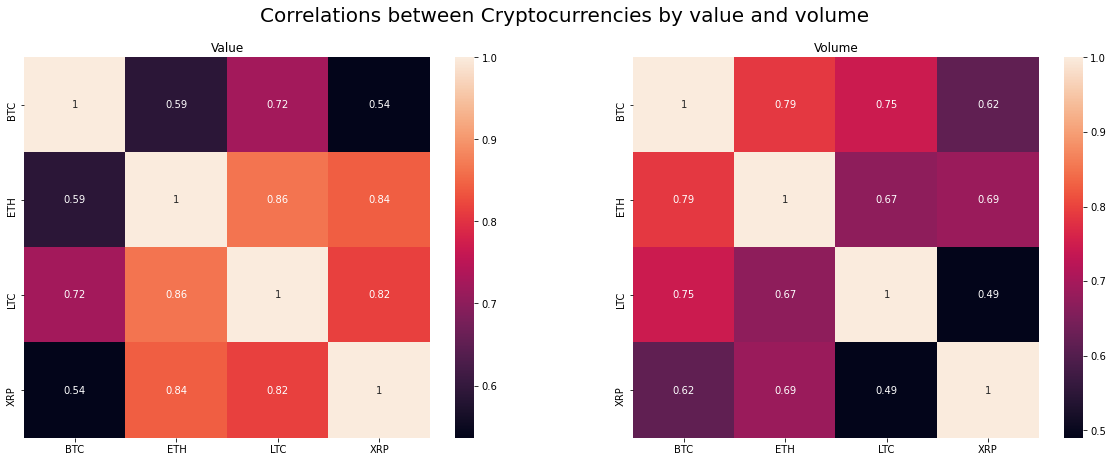

In [18]:
fig = plt.figure(figsize = [20, 7])
plt.suptitle("Correlations between Cryptocurrencies by value and volume", fontsize = 20)

plt.subplot(121)
plt.title('Value')
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.subplot(122)
plt.title('Volume')
corrMatrixV = dfV.corr()
sn.heatmap(corrMatrixV, annot=True)

plt.show()

In [19]:
valueVolumeCorr = pd.concat([btc, btcV], axis = 1)

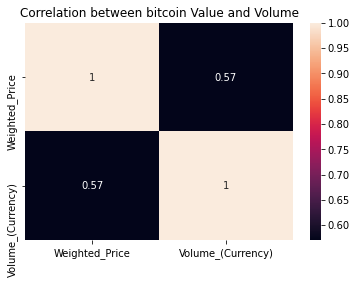

In [20]:
plt.title('Correlation between bitcoin Value and Volume')
valueVolumeCorrMatrix = valueVolumeCorr.corr()
sn.heatmap(valueVolumeCorrMatrix, annot=True)
plt.show()

# Foreign Exchange Rates

In [21]:
import requests

In [22]:
url = "https://api.exchangeratesapi.io/history?start_at=2016-12-30&end_at=2020-08-16&base=USD&symbols=EUR"
r = requests.get(url)

In [23]:
hist_rates = r.json()

In [24]:
rates_by_date = hist_rates['rates']
# Convert the dictionary into desired format
hist_data = []
for key, value in rates_by_date.items():
    hist_dict = {'date': key, 'EUR': value['EUR']}
    hist_data.append(hist_dict)

In [25]:
hist_data.sort(key = lambda x:x['date'])

In [26]:
# Create pandas dataframe
df = pd.DataFrame.from_dict(hist_data)
df.set_index('date', inplace=True)
df.head()

,EUR
date,
2016-12-30,0.948677
2017-01-02,0.955566
2017-01-03,0.962927
2017-01-04,0.958130
2017-01-05,0.952290


In [27]:
import datetime

In [28]:
today = datetime.datetime.now().date()

In [29]:
date = datetime.datetime.strptime('2017-01-01', '%Y-%m-%d').date()

In [30]:
idx = pd.date_range('2016-12-30', '2020-08-16')

In [31]:
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(idx)

In [32]:
df['EUR'] = df['EUR'].interpolate(method='slinear').interpolate(method='linear')

In [33]:
df[df.index >= '2017']

,EUR
2017-01-01,0.953270
2017-01-02,0.955566
2017-01-03,0.962927
2017-01-04,0.958130
2017-01-05,0.952290
...,...
2020-08-12,0.849545
2020-08-13,0.845094
2020-08-14,0.846525
2020-08-15,0.846525
